In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/Admin/Downloads/VaccineUsagePrediction/Vaccine Usage Prediction/Dataset/h1n1_vaccine_prediction.csv')

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.describe(include='object')

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [5]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
a = df.isna().sum()

In [7]:
percentage = a/df.isna().count()

In [8]:
percentage.sort_values()*100

unique_id                     0.000000
census_msa                    0.000000
sex                           0.000000
race                          0.000000
age_bracket                   0.000000
h1n1_vaccine                  0.000000
bought_face_mask              0.071142
wash_hands_frequently         0.157262
antiviral_medication          0.265848
reduced_outside_home_cont     0.307036
avoid_large_gatherings        0.325757
h1n1_worry                    0.344479
h1n1_awareness                0.434343
avoid_touch_face              0.479275
contact_avoidance             0.778822
no_of_adults                  0.932340
no_of_children                0.932340
is_h1n1_risky                 1.452803
is_h1n1_vacc_effective        1.464036
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
is_health_worker              3.010447
cont_child_undr_6_mnths       3.070356
chronic_medic_condition  

In [9]:
print('Shape of df', df.shape)

Shape of df (26707, 34)


In [10]:
#lets seperate numeric and categorical data
numeric_dtypes = df.select_dtypes(include=np.number)
categorical_dtypes = df.select_dtypes(include='object')

In [11]:
numeric_dtypes.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
no_of_adults                   249
no_of_children                 249
h1n1_vaccine                     0
dtype: int64

In [12]:
#replace null values of numeric variables with mean
for i in numeric_dtypes:
    avg = numeric_dtypes[i].mean(axis=0)
    numeric_dtypes[i].replace(np.nan,avg,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
numeric_dtypes.isna().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [14]:
#replace null values of numeric variables with mode
for i in categorical_dtypes:
    avg =categorical_dtypes[i].mode()[0]
    categorical_dtypes.replace(np.nan,avg,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
categorical_dtypes.isna().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [17]:
numeric_dtypes.shape

(26707, 25)

In [18]:
#create dummy variables 
df_cat_dummies = pd.get_dummies(categorical_dtypes)

In [19]:
merge_df_all = pd.concat([numeric_dtypes, df_cat_dummies], axis=1)

In [20]:
merge_df_all

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,housing_status_65+ Years,housing_status_Own,housing_status_Rent,employment_65+ Years,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,0,1,0,0,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.000000,...,0,0,1,0,1,0,0,1,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0,1,0,0,1,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,0,0,1,0,0,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.000000,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,...,0,1,0,0,0,1,0,0,0,1
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,...,0,0,1,0,1,0,0,0,1,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,...,0,1,0,1,0,0,0,1,0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.677264,...,0,0,1,0,1,0,0,0,0,1


In [21]:
merge_df_all = merge_df_all.drop(['unique_id'], axis=1)

In [22]:
merge_df_all.shape

(26707, 57)

In [23]:
#df_dummy.isna().sum #checking if we have missing valuess before training model

In [24]:
merge_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   h1n1_worry                              26707 non-null  float64
 1   h1n1_awareness                          26707 non-null  float64
 2   antiviral_medication                    26707 non-null  float64
 3   contact_avoidance                       26707 non-null  float64
 4   bought_face_mask                        26707 non-null  float64
 5   wash_hands_frequently                   26707 non-null  float64
 6   avoid_large_gatherings                  26707 non-null  float64
 7   reduced_outside_home_cont               26707 non-null  float64
 8   avoid_touch_face                        26707 non-null  float64
 9   dr_recc_h1n1_vacc                       26707 non-null  float64
 10  dr_recc_seasonal_vacc                   26707 non-null  fl

In [25]:
numeric_dtypes.corr()['h1n1_vaccine'][numeric_dtypes.corr()['h1n1_vaccine'] > 0.1].sort_values(ascending=False)

h1n1_vaccine              1.000000
dr_recc_h1n1_vacc         0.384662
is_h1n1_risky             0.320833
is_h1n1_vacc_effective    0.267491
is_seas_risky             0.256192
dr_recc_seasonal_vacc     0.204946
is_seas_vacc_effective    0.177786
is_health_worker          0.167490
h1n1_worry                0.121747
h1n1_awareness            0.117714
Name: h1n1_vaccine, dtype: float64

In [26]:
impt_feats = ['h1n1_vaccine', 'dr_recc_h1n1_vacc', 'is_h1n1_risky', 'is_h1n1_vacc_effective', 'is_seas_risky', 'dr_recc_seasonal_vacc', 
             'is_seas_vacc_effective', 'is_health_worker', 'h1n1_worry', 'h1n1_awareness']

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


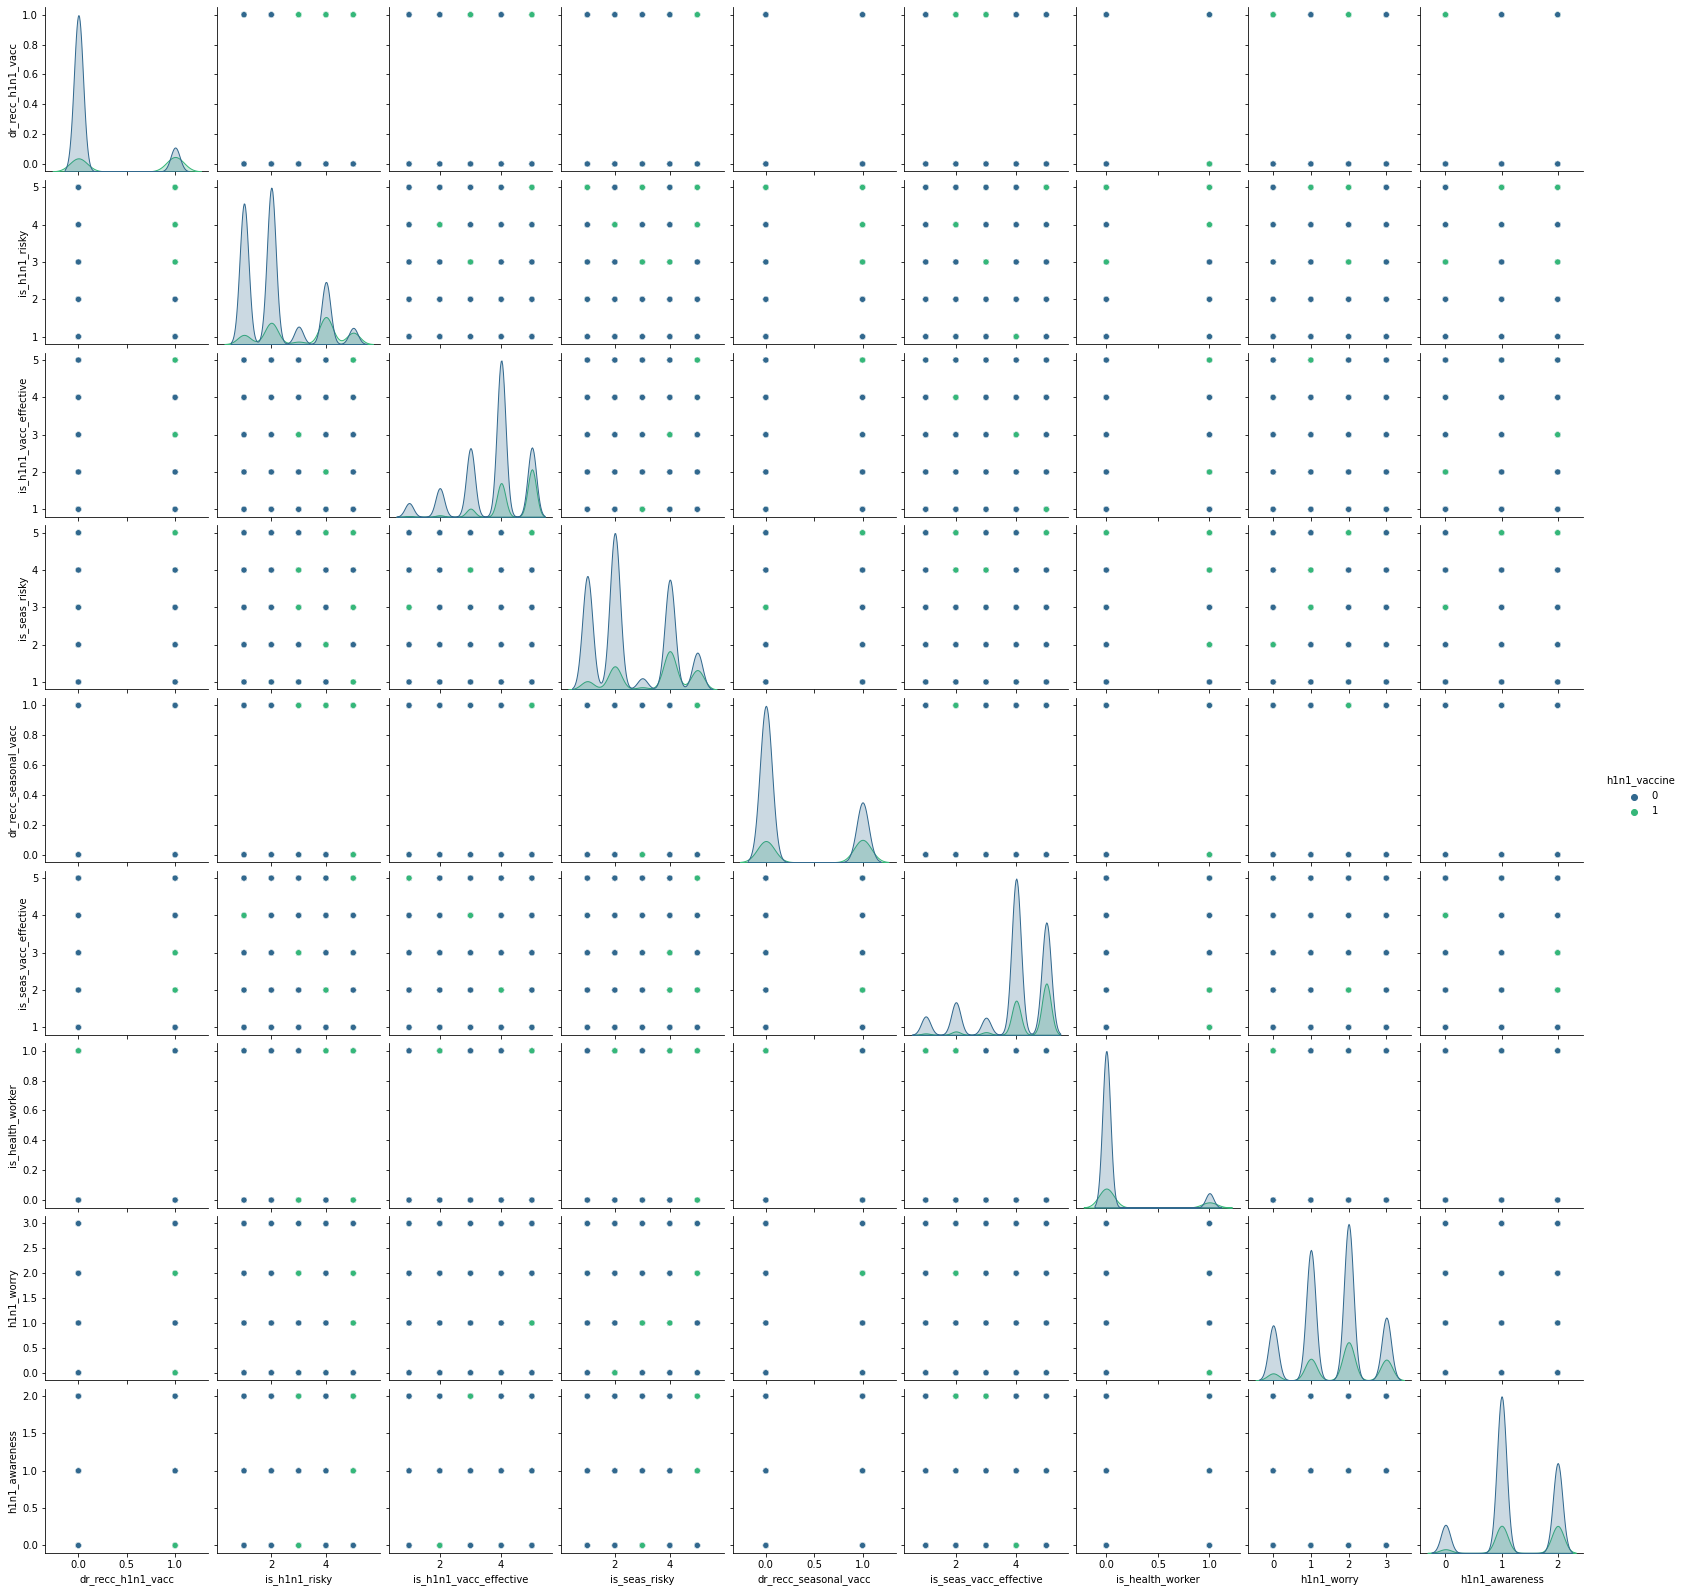

In [28]:
sns.pairplot(df[impt_feats], hue = 'h1n1_vaccine', palette='viridis', size=2.5)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


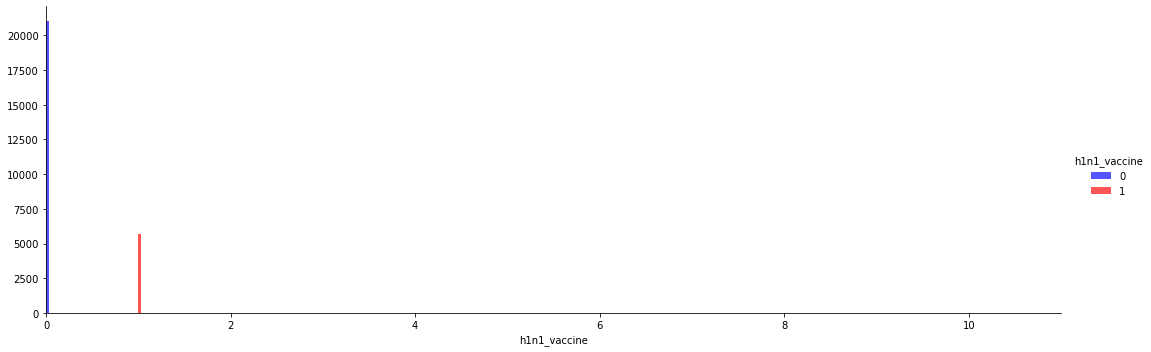

In [33]:
#take a further look at h1n1_vaccine
facet = sns.FacetGrid(df, hue = 'h1n1_vaccine', size=5, aspect=3, palette='seismic')
facet.map(plt.hist, 'h1n1_vaccine', bins=30)
facet.set(xlim=(0, df.h1n1_vaccine.max() + 10))
facet.add_legend()
##do this for h1n1_vaccine and other continuous variable

In [34]:
x = merge_df_all.drop('h1n1_vaccine', axis=1)
y = merge_df_all['h1n1_vaccine']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7,random_state=100)

**Building Logistic Regression Model**

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr2 =  LogisticRegression(max_iter=1000)

In [39]:
#fit the model
lr.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#fit the model
lr2.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [41]:
#making predictions using data
y_pred = lr.predict(X_test)

In [42]:
y_pred2 = lr2.predict(X_test)

In [43]:
y_pred #predictions for test data

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
#gettting model performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [45]:
confusion_matrix(y_test, y_pred)

array([[5977,  360],
       [ 952,  724]], dtype=int64)

In [46]:
confusion_matrix(y_test, y_pred2)

array([[5981,  356],
       [ 949,  727]], dtype=int64)

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_test, y_pred)

0.5246376811594202

In [49]:
accuracy_score(y_test,y_pred)

0.8362660676400848

In [50]:
accuracy_score(y_test,y_pred2)

0.8371396480718832

In [51]:
precision_score(y_test,y_pred)

0.6678966789667896

In [52]:
precision_score(y_test,y_pred2)

0.6712834718374885

In [53]:
recall_score(y_test,y_pred)

0.431980906921241

In [54]:
recall_score(y_test,y_pred2)

0.4337708830548926

In [55]:
roc_auc_score(y_test,y_pred)

0.6875858456020123

In [56]:
roc_auc_score(y_test,y_pred2)

0.6887964404228226